/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default v

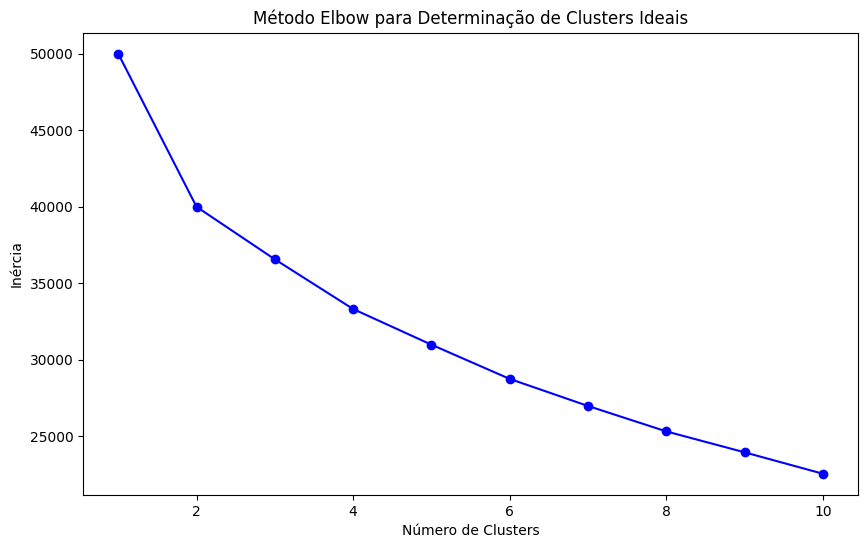

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


             Idade    Gênero         Renda  Frequência_Visitas  Valor_Gasto
Cluster                                                                    
0        35.222760  1.000000  11550.839777           13.646074   677.457020
1        34.684164  0.999222   8473.353190           10.317775   322.286657
2        36.510358  0.001811   8557.566134           14.867361   544.020701
3        33.783892  0.000000  11265.723193            9.658797   468.919287


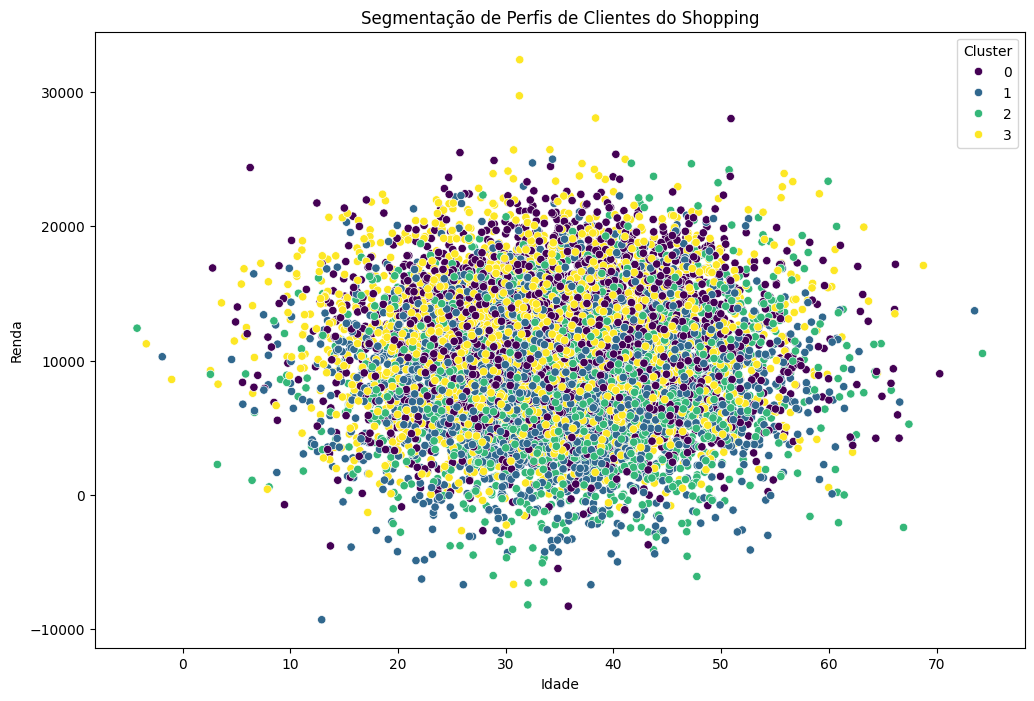

In [12]:
#código em Python para realizar a segmentação de clientes de Shopping
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Passo 1: Gerar Dados Fictícios
# Simulando 16,3 milhões de visitantes
n = 10000  # Exemplo com 10.000 para simulação
np.random.seed(42)

# Gerando características fictícias
idades = np.random.normal(loc=35, scale=10, size=n)  # Idade média de 35 anos
generos = np.random.choice([0, 1], size=n)  # 0 para Feminino, 1 para Masculino
rendas = np.random.normal(loc=10000, scale=5000, size=n)  # Renda média de R$ 10.000
frequencia_visitas = np.random.poisson(lam=12, size=n)  # Frequência média de 12 visitas/ano
valor_gasto = np.random.normal(loc=500, scale=300, size=n)  # Gasto médio de R$ 500

# Criando DataFrame
data = pd.DataFrame({
    'Idade': idades,
    'Gênero': generos,
    'Renda': rendas,
    'Frequência_Visitas': frequencia_visitas,
    'Valor_Gasto': valor_gasto
})

# Passo 2: Pré-processar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Passo 3: Determinar o número ideal de clusters usando o método Elbow
inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método Elbow para Determinação de Clusters Ideais')
plt.show()

# Passo 4: Aplicar o K-means com o número de clusters ideal
k = 4  # Exemplo: usando 4 clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters ao DataFrame
data['Cluster'] = clusters

# Passo 5: Análise dos perfis de clientes
cluster_analysis = data.groupby('Cluster').mean()
print(cluster_analysis)

# Passo 6: Visualização dos clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Idade', y='Renda', hue='Cluster', data=data, palette='viridis')
plt.title('Segmentação de Perfis de Clientes do Shopping')
plt.show()

# Passo 7: Salvar os resultados
data.to_csv('segmentacao_perfis_clientes_morumbi.csv', index=False)



Vamos criar um código Python que simula dados fictícios para os visitantes do Shopping e implementa algumas das técnicas mencionadas, como segmentação de clientes e análises de dados. Este código inclui a geração de dados, aplicação de clusterização com K-means, análise de cestas de compras (Market Basket Analysis), e a criação de um modelo de recomendação simples.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Análise dos Clusters:
              Idade         Renda  Frequência_Visitas  Valor_Gasto    Roupas  \
Cluster                                                                       
0        34.689725   8608.742272           16.186621   592.582706  0.502343   
1        45.263006  12211.316253           10.771113   565.874330  0.508287   
2        26.369802  11766.279542           10.378246   640.900669  0.512232   
3        33.959625   7229.849300           10.939480   192.416870  0.495938   

         Eletrônicos  Alimentação  Entretenimento    Beleza  
Cluster                                                      
0           0.512995     0.495952        0.490413  0.486153  
1           0.503946     0.489740        0.515785  0.494870  
2           0.493414     0.488521        0.513737  0.482875  
3           0.519903     0.493095        0.497563  0.485784  


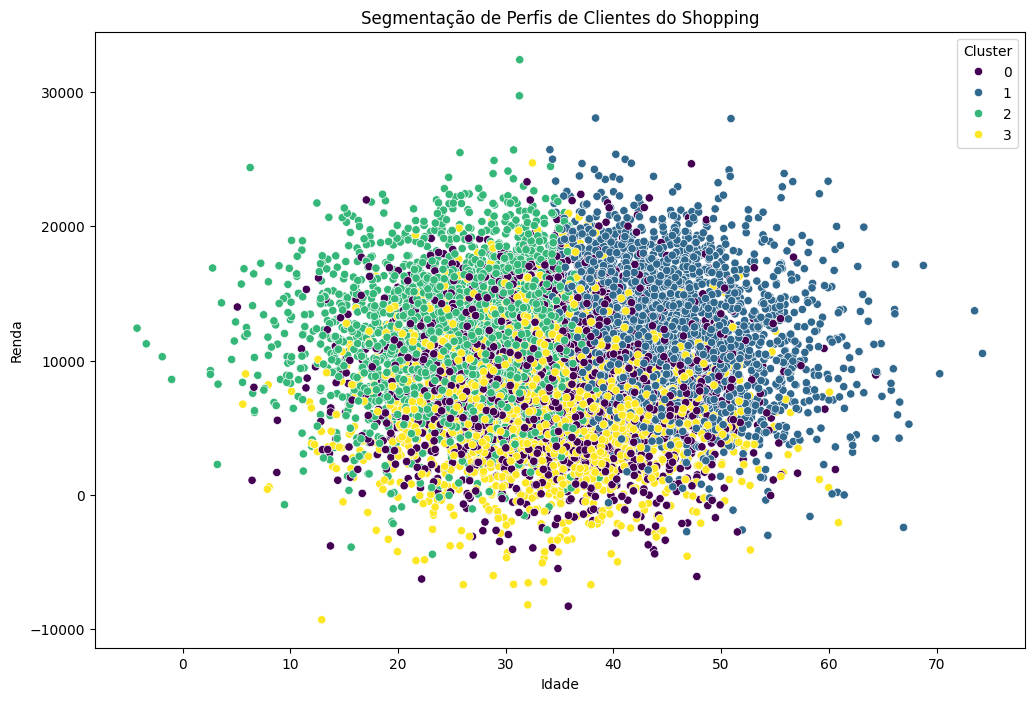

Regras de Associação:
                   antecedents  \
0               (Eletrônicos)   
1                    (Roupas)   
2                    (Roupas)   
3               (Alimentação)   
4                    (Roupas)   
..                        ...   
97      (Roupas, Alimentação)   
98      (Eletrônicos, Roupas)   
99   (Roupas, Entretenimento)   
100             (Eletrônicos)   
101                  (Roupas)   

                                           consequents  support  confidence  \
0                                             (Roupas)   0.2601    0.512815   
1                                        (Eletrônicos)   0.2601    0.515152   
2                                        (Alimentação)   0.2484    0.491979   
3                                             (Roupas)   0.2484    0.505186   
4                                     (Entretenimento)   0.2549    0.504852   
..                                                 ...      ...         ...   
97               (Eletrônic

<ipython-input-14-7d7e4fdd382f>:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.metrics.pairwise import cosine_similarity

# Passo 1: Gerar Dados Fictícios
n = 10000  # Simulando 10.000 visitantes

np.random.seed(42)

# Gerando características fictícias
idades = np.random.normal(loc=35, scale=10, size=n)  # Idade média de 35 anos
generos = np.random.choice(['Feminino', 'Masculino'], size=n)  # Gêneros
rendas = np.random.normal(loc=10000, scale=5000, size=n)  # Renda média de R$ 10.000
frequencia_visitas = np.random.poisson(lam=12, size=n)  # Frequência média de 12 visitas/ano
valor_gasto = np.random.normal(loc=500, scale=300, size=n)  # Gasto médio de R$ 500

# Simulando compras de categorias de produtos
categorias = ['Roupas', 'Eletrônicos', 'Alimentação', 'Entretenimento', 'Beleza']
compras = np.random.randint(0, 2, size=(n, len(categorias)))  # Compras simuladas em categorias

# Criando DataFrame
data = pd.DataFrame({
    'Idade': idades,
    'Gênero': generos,
    'Renda': rendas,
    'Frequência_Visitas': frequencia_visitas,
    'Valor_Gasto': valor_gasto
})

# Adicionando compras ao DataFrame
for i, cat in enumerate(categorias):
    data[cat] = compras[:, i]

# Passo 2: Segmentação com K-means
# Pré-processamento
scaler = StandardScaler()
# Exclua a coluna 'Gênero' da escala, pois é categórica
X_scaled = scaler.fit_transform(data[['Idade', 'Renda', 'Frequência_Visitas', 'Valor_Gasto']])

# Determinar número de clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')  # Ajuste n_init para evitar o FutureWarning
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Análise dos clusters
cluster_analysis = data.groupby('Cluster').mean(numeric_only=True)  # Adicionado numeric_only=True para evitar erros
print("Análise dos Clusters:\n", cluster_analysis)

# Visualização dos clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Idade', y='Renda', hue='Cluster', data=data, palette='viridis')
plt.title('Segmentação de Perfis de Clientes do Shopping')
plt.show()

# Passo 3: Análise de Cesta de Compras (Market Basket Analysis)
# Convertendo para formato apropriado
basket = data[categorias]
basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)

# Aplicando Apriori
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print("Regras de Associação:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Passo 4: Sistema de Recomendação Simples
# Criando matriz de similaridade
similarity_matrix = cosine_similarity(basket_sets.T)
similarity_df = pd.DataFrame(similarity_matrix, index=categorias, columns=categorias)

# Função de recomendação baseada em item
def recomendar_categoria(categoria, top_n=2):
    if categoria not in similarity_df.columns:
        return "Categoria não encontrada."
    similar_items = similarity_df[categoria].sort_values(ascending=False)[1:top_n+1]
    return similar_items.index.tolist()

# Exemplo de recomendação
categoria_exemplo = 'Roupas'
recomendacoes = recomendar_categoria(categoria_exemplo)
print(f"Recomendações para quem comprou {categoria_exemplo}: {recomendacoes}")



####Para melhorar o código utilizando o conjunto de dados do link fornecido, podemos adaptar o código para processar e analisar dados reais de clientes de um shopping. Aqui está um plano de ação e o código atualizado com base no conjunto de dados fornecido.

Passos para Melhorar o Código:
Importar e Preparar os Dados:

Carregar o conjunto de dados do CSV.
Explorar e entender as colunas disponíveis.
Pré-processar os Dados:

Lidar com dados ausentes.
Codificar variáveis categóricas, se necessário.
Escalonar características numéricas.
Análise de Segmentação com K-means:

Ajustar o número de clusters baseado em análise dos dados.
Avaliar a qualidade dos clusters gerados.
Análise de Cesta de Compras:

Adaptar a análise de cesta de compras para dados reais, se relevante.
Sistema de Recomendação:

Verificar a aplicabilidade do sistema de recomendação com base nos dados disponíveis.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Colunas disponíveis: Index(['id', 'gender', 'age', 'income', 'score'], dtype='object')
   id  gender  age  income  score
0   1    Male   19      15     39
1   2    Male   21      15     81
2   3  Female   20      16      6
3   4  Female   23      16     77
4   5  Female   31      17     40
Colunas ajustadas: Index(['id', 'gender', 'age', 'income', 'score'], dtype='object')
Dados ausentes:
 id        0
gender    0
age       0
income    0
score     0
dtype: int64


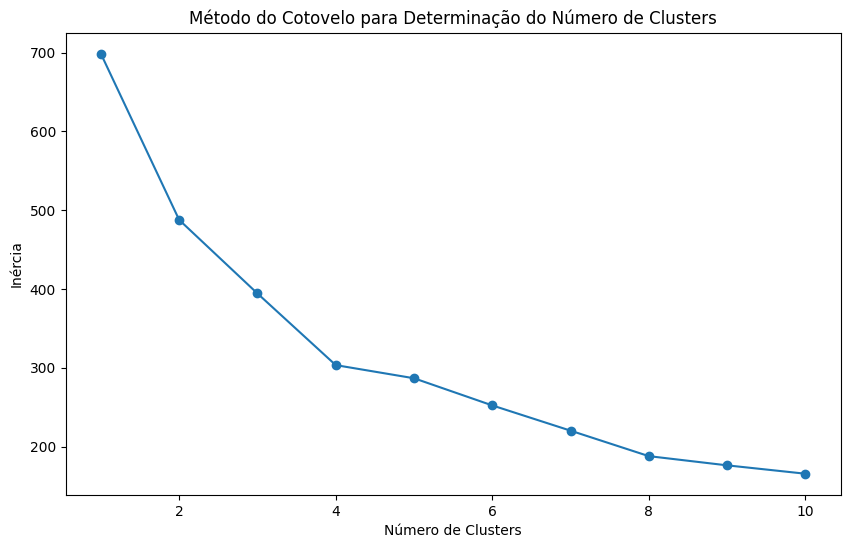

Análise dos Clusters:
                  id        age     income      score
Cluster                                             
0         69.415385  53.984615  47.707692  39.969231
1        161.025000  32.875000  86.100000  81.525000
2         53.438596  25.438596  40.000000  60.298246
3        160.552632  39.368421  86.500000  19.578947


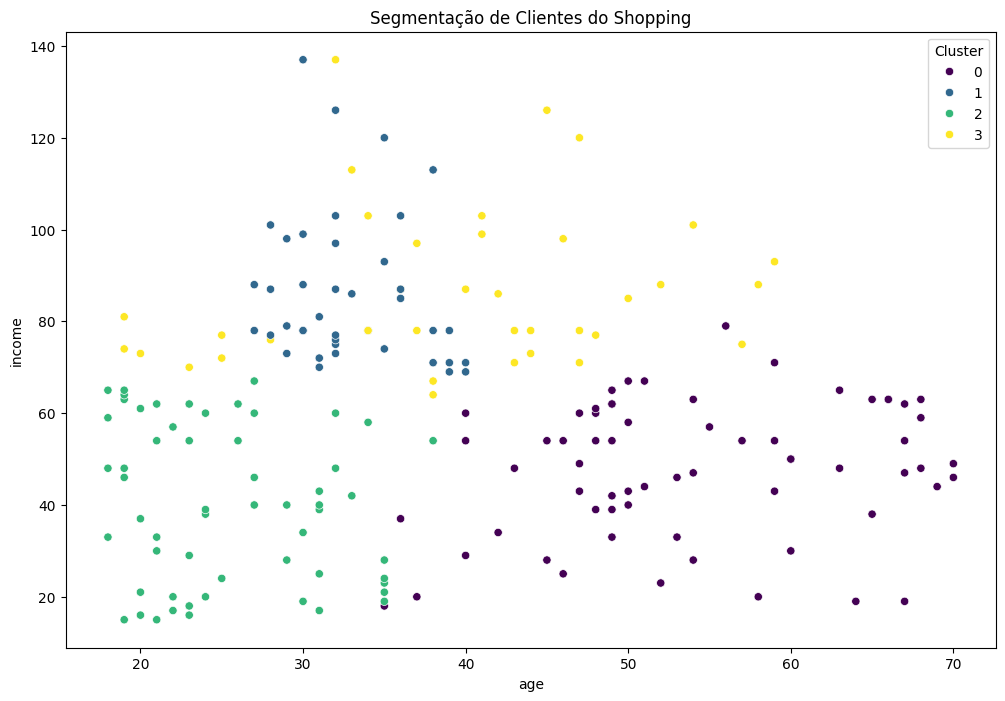

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Passo 1: Importar e Preparar os Dados
url = '/content/mall_customers.csv'
data = pd.read_csv(url)

# Verificar os nomes das colunas e as primeiras linhas do DataFrame
print("Colunas disponíveis:", data.columns)
print(data.head())

# Ajustar os nomes das colunas conforme necessário
data.columns = data.columns.str.strip().str.lower()  # Normalizar nomes das colunas
print("Colunas ajustadas:", data.columns)

# Passo 2: Pré-processar os Dados
# Verificar e tratar dados ausentes
print("Dados ausentes:\n", data.isnull().sum())

# Definir as características categóricas e numéricas
categorical_features = ['gender']
numerical_features = ['age', 'income', 'score']

# Criar um pipeline para pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Aplicar o pipeline para pré-processar os dados
X = preprocessor.fit_transform(data)

# Passo 3: Segmentação com K-means
# Determinar número de clusters usando o método do cotovelo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotar o método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Determinação do Número de Clusters')
plt.show()

# Escolher o número de clusters com base no método do cotovelo
n_clusters = 4  # Ajustar conforme a análise

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
data['Cluster'] = kmeans.fit_predict(X)

# Análise dos clusters
# Usar apenas colunas numéricas para a análise
cluster_analysis = data.groupby('Cluster').mean(numeric_only=True)
print("Análise dos Clusters:\n", cluster_analysis)

# Visualização dos clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='income', hue='Cluster', data=data, palette='viridis')
plt.title('Segmentação de Clientes do Shopping')
plt.show()





O gráfico acima  mostra como os clientes são agrupados com base em suas idades e rendas. Cada cor representa um cluster, permitindo identificar grupos de clientes com perfis semelhantes. As cores diferentes indicam que os grupos possuem características distintas em termos dessas variáveis.

Para criar uma base de dados fictícia que inclua informações sobre clientes e a aquisição de pacotes fornecidos pela Empresa de TV_STREAMER Brasil, você pode seguir este exemplo. Vamos gerar um DataFrame com informações fictícias sobre clientes e incluir uma coluna indicando se o cliente adquiriu ou não um pacote da TV_STREAMER Brasil,

In [6]:
import pandas as pd
import numpy as np

# Carregar o arquivo CSV vazio
df = pd.read_csv('clientes_complementares.csv')

# Configuração
np.random.seed(42)
n = 1000  # Número de clientes

# Gerar dados fictícios
data = {
    'id': np.arange(1, n + 1),
    'gender': np.random.choice(['Male', 'Female'], size=n),
    'age': np.random.randint(18, 70, size=n),
    'income': np.random.randint(2000, 10000, size=n),
    'score': np.random.randint(0, 100, size=n),
    'adquiriu_pacote': np.random.randint(0, 2, size=n)  # 0 = Não, 1 = Sim
}

# Criar DataFrame com dados fictícios
df = pd.DataFrame(data)

# Salvar o DataFrame preenchido em um arquivo CSV
df.to_csv('clientes_complementares.csv', index=False)

# Mostrar as primeiras linhas do DataFrame
print(df.head())



   id  gender  age  income  score  adquiriu_pacote
0   1    Male   34    5681     30                1
1   2  Female   26    3290     46                1
2   3    Male   50    3640     54                1
3   4    Male   37    7047     79                0
4   5    Male   30    9490     61                0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Vamos definir a aquisição de pacotes com base nas idades estabelecidas, você pode usar a seguinte abordagem:

Definir as Faixas Etárias: Primeiro, vamos criar uma função para categorizar as idades em faixas etárias.
Definir a Probabilidade de Aquisição de Pacote: Para cada faixa etária, você pode definir a probabilidade de adquirir cada tipo de pacote.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


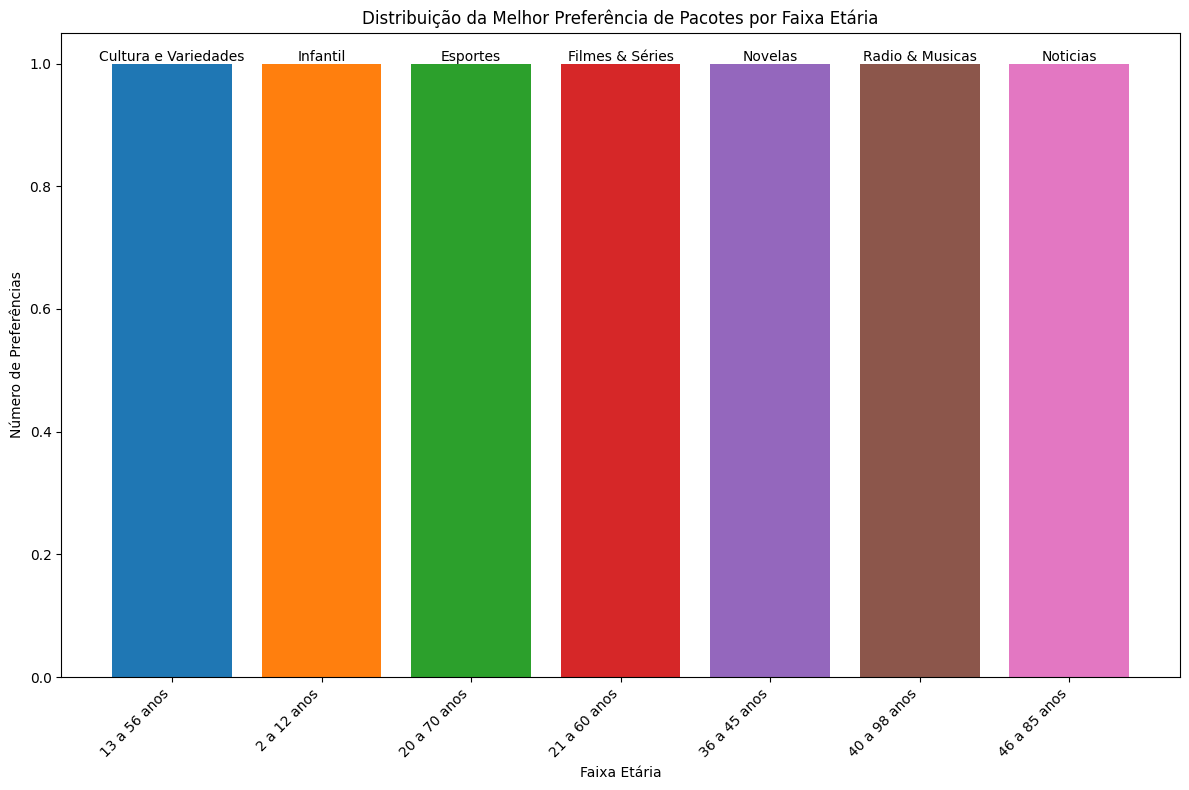

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dados fictícios fornecidos (novos)
data = {
    'age_group': ['13 a 56 anos', '2 a 12 anos', '21 a 60 anos', '36 a 45 anos', '46 a 85 anos', '20 a 70 anos', '40 a 98 anos'],
    'package_preference': ['Cultura e Variedades', 'Infantil', 'Filmes & Séries', 'Novelas', 'Noticias', 'Esportes', 'Radio & Musicas']
}

# Criar DataFrame com dados fictícios
df = pd.DataFrame(data)

# Contar a quantidade de cada pacote por faixa etária
package_counts = df.groupby(['age_group', 'package_preference']).size().unstack(fill_value=0)

# Encontrar o pacote mais popular para cada faixa etária
most_preferred_package = package_counts.idxmax(axis=1)
preferences_count = package_counts.max(axis=1)

# Preparar dados para o gráfico
preference_df = pd.DataFrame({
    'age_group': most_preferred_package.index,
    'most_preferred_package': most_preferred_package.values,
    'count': preferences_count.values
})

# Plotar o gráfico de barras para a preferência de pacotes por faixa etária
plt.figure(figsize=(12, 8))
colors = plt.get_cmap('tab10').colors
bars = plt.bar(preference_df['age_group'], preference_df['count'], color=[colors[i % len(colors)] for i in range(len(preference_df))])

# Adicionar rótulos ao gráfico
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Preferências')
plt.title('Distribuição da Melhor Preferência de Pacotes por Faixa Etária')
plt.xticks(rotation=45, ha='right')

# Adicionar rótulos sobre as barras
for bar, pkg in zip(bars, preference_df['most_preferred_package']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, pkg, ha='center', va='bottom')

plt.tight_layout()
plt.show()




 Podemos criar alguns gráficos para visualizar a distribuição das aquisições de pacotes com base nas faixas etárias. Usaremos a biblioteca matplotlib para gráficos básicos e seaborn para gráficos mais estilizados.

Aqui estão alguns exemplos de gráficos que você pode gerar:

Distribuição de Pacotes por Faixa Etária: Um gráfico de barras para mostrar a quantidade de cada tipo de pacote adquirido por faixa etária.
Distribuição de Pacotes por Idade: Um gráfico de barras empilhadas para mostrar a distribuição de pacotes adquiridos em diferentes faixas etárias.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1200x800 with 0 Axes>

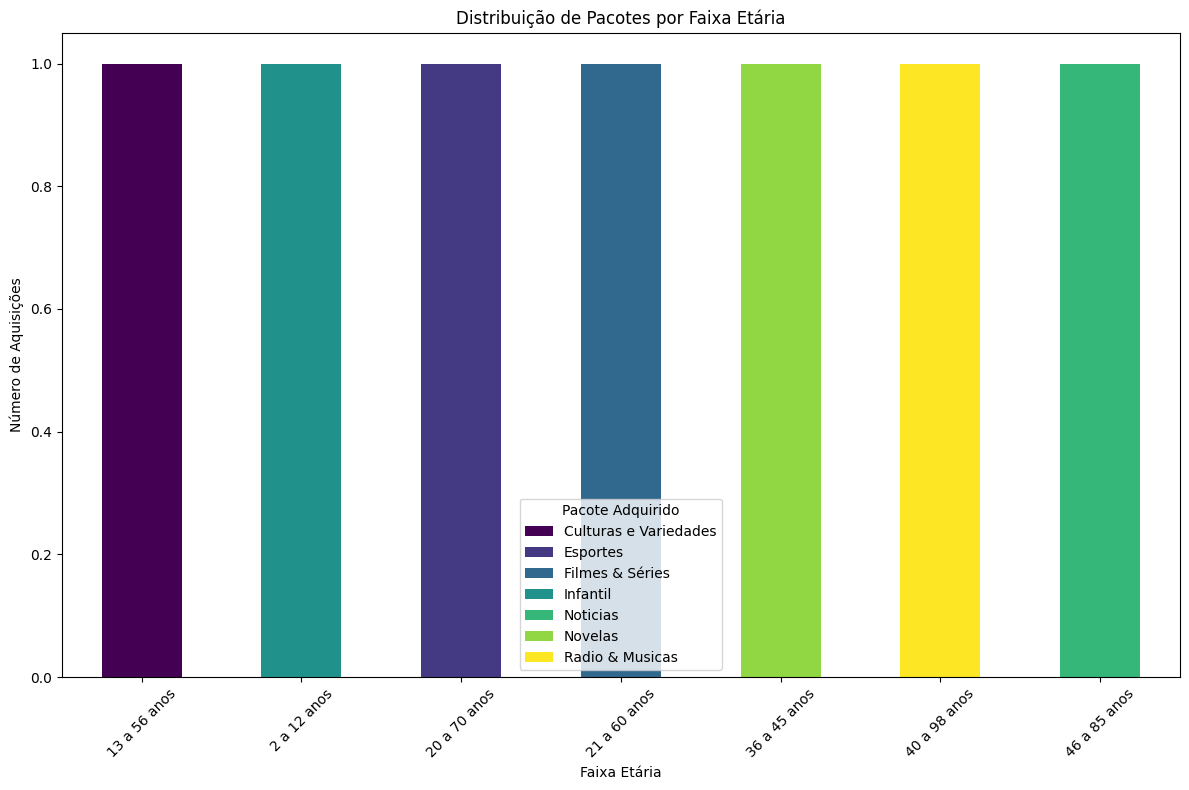

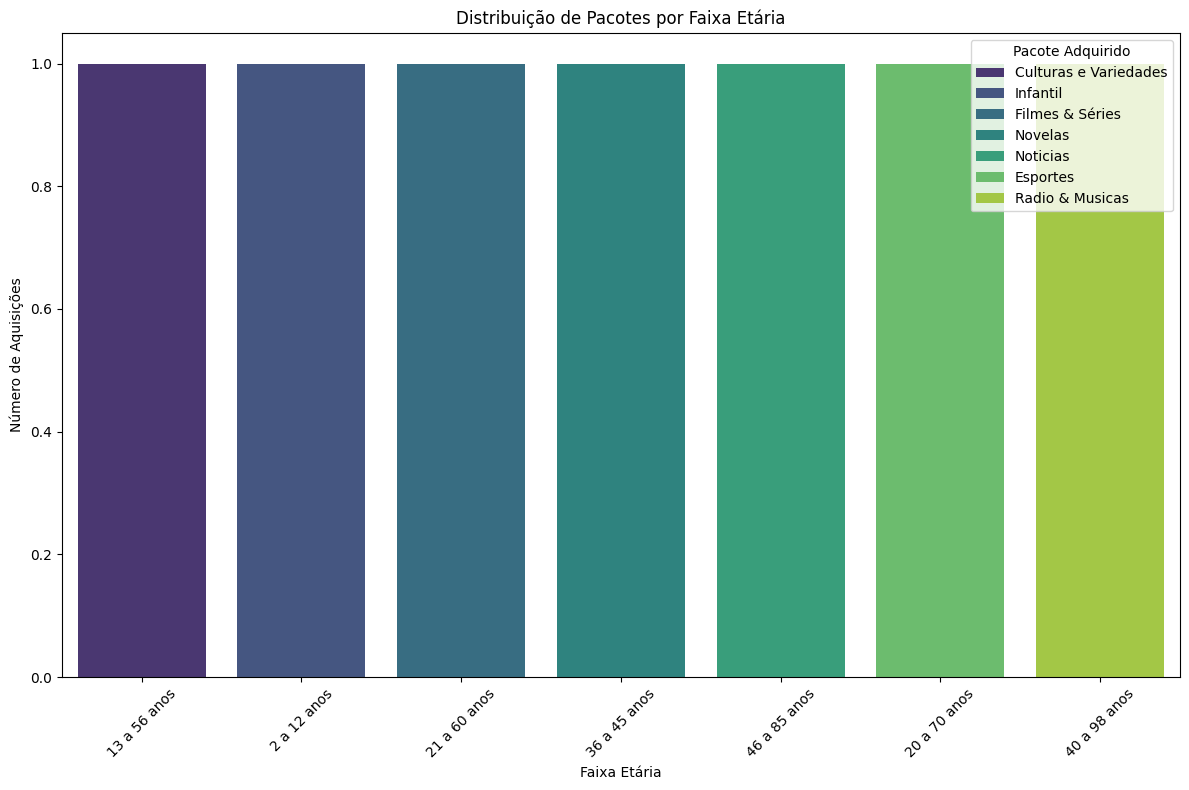

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dados atualizados
data = {
    'age_group': ['13 a 56 anos', '2 a 12 anos', '21 a 60 anos', '36 a 45 anos', '46 a 85 anos', '20 a 70 anos', '40 a 98 anos'],
    'package_preference': ['Culturas e Variedades', 'Infantil', 'Filmes & Séries', 'Novelas', 'Noticias', 'Esportes', 'Radio & Musicas']
}

# Criar DataFrame com os novos dados
df_clientes = pd.DataFrame(data)

# Contar a quantidade de cada pacote adquirido por faixa etária
package_counts = df_clientes.groupby(['age_group', 'package_preference']).size().unstack(fill_value=0)

# Gráfico de barras empilhadas com Matplotlib
plt.figure(figsize=(12, 8))
package_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))
plt.title('Distribuição de Pacotes por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Aquisições')
plt.legend(title='Pacote Adquirido')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de barras com Seaborn
plt.figure(figsize=(12, 8))
sns.countplot(data=df_clientes, x='age_group', hue='package_preference', palette='viridis')
plt.title('Distribuição de Pacotes por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Aquisições')
plt.xticks(rotation=45)
plt.legend(title='Pacote Adquirido')
plt.tight_layout()
plt.show()




Para visualizar a preferência de pacotes por faixa etária usando um gráfico, você pode criar um gráfico separado para cada faixa etária, mostrando a proporção de cada tipo de pacote adquirido dentro daquela faixa etária.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-17-7a470489a207>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3', len(preference_counts.columns))  # Usar paleta Set3


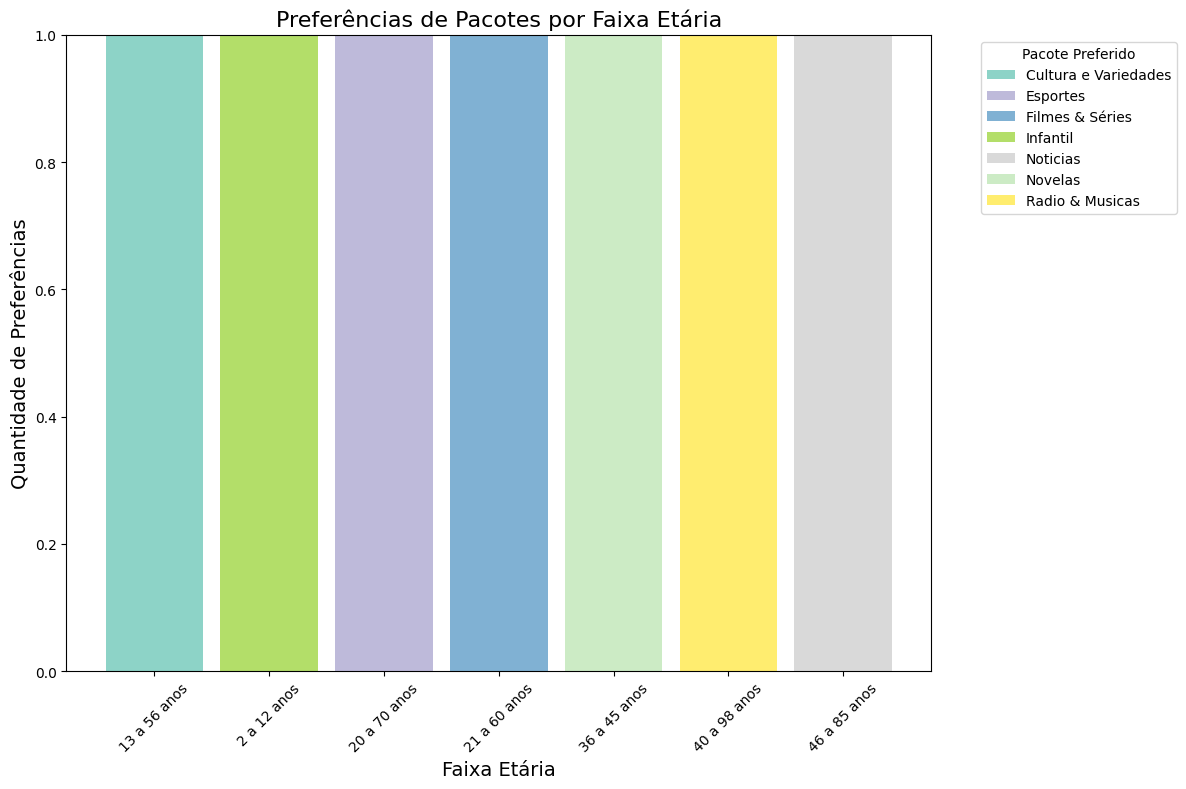

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ajustar os dados com base nas novas faixas etárias
data = {
    'age_group': ['13 a 56 anos', '2 a 12 anos', '21 a 60 anos', '36 a 45 anos', '46 a 85 anos', '20 a 70 anos', '40 a 98 anos'],
    'package_preference': ['Cultura e Variedades', 'Infantil', 'Filmes & Séries', 'Novelas', 'Noticias', 'Esportes', 'Radio & Musicas']
}
df = pd.DataFrame(data)

# Contar a quantidade de cada preferência de pacote para cada faixa etária
preference_counts = df.groupby('age_group')['package_preference'].value_counts().unstack().fillna(0)

# Configurar o gráfico
fig, ax = plt.subplots(figsize=(12, 8))

# Configurar posições e cores
bar_width = 0.85
index = np.arange(len(preference_counts))
colors = plt.cm.get_cmap('Set3', len(preference_counts.columns))  # Usar paleta Set3

# Criar gráfico de barras empilhadas
bottom = np.zeros(len(preference_counts))  # Inicializa a base para as barras empilhadas
for i, col in enumerate(preference_counts.columns):
    ax.bar(index, preference_counts[col], bar_width, label=col, bottom=bottom, color=colors(i))
    bottom += preference_counts[col]  # Atualiza a base para a próxima camada da pilha

# Adicionar rótulos, título e legendas
ax.set_xlabel('Faixa Etária', fontsize=14)
ax.set_ylabel('Quantidade de Preferências', fontsize=14)
ax.set_title('Preferências de Pacotes por Faixa Etária', fontsize=16)
ax.set_xticks(index)
ax.set_xticklabels(preference_counts.index, rotation=45)

# Adicionar a legenda fora do gráfico
ax.legend(title='Pacote Preferido', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar o layout para que todos os elementos sejam visíveis
plt.tight_layout()

# Mostrar o gráfico
plt.show()







Para implementar a análise e visualização das preferências de pacotes de streaming por faixa etária com base nos dados de clientes do shopping, aqui está um código em Python que incorpora parte das melhorias mencionadas, com foco na segmentação de clientes, visualização interativa e análise de adesão de pacotes de streaming.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-9-90522519a9bb>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['Faixa_Etaria', 'Pacote_Streaming']).size().unstack().fillna(0)


<Figure size 1200x700 with 0 Axes>

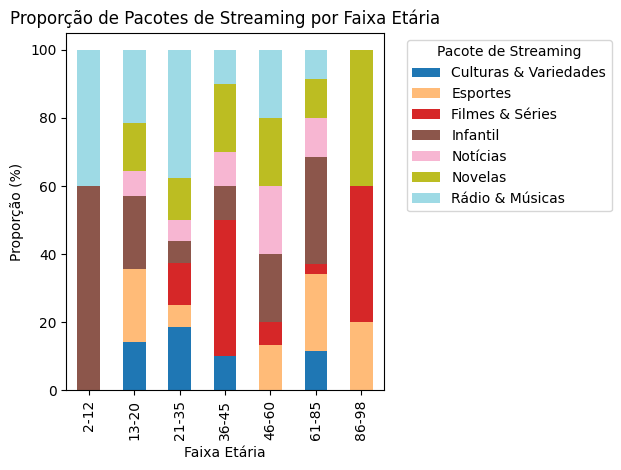

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


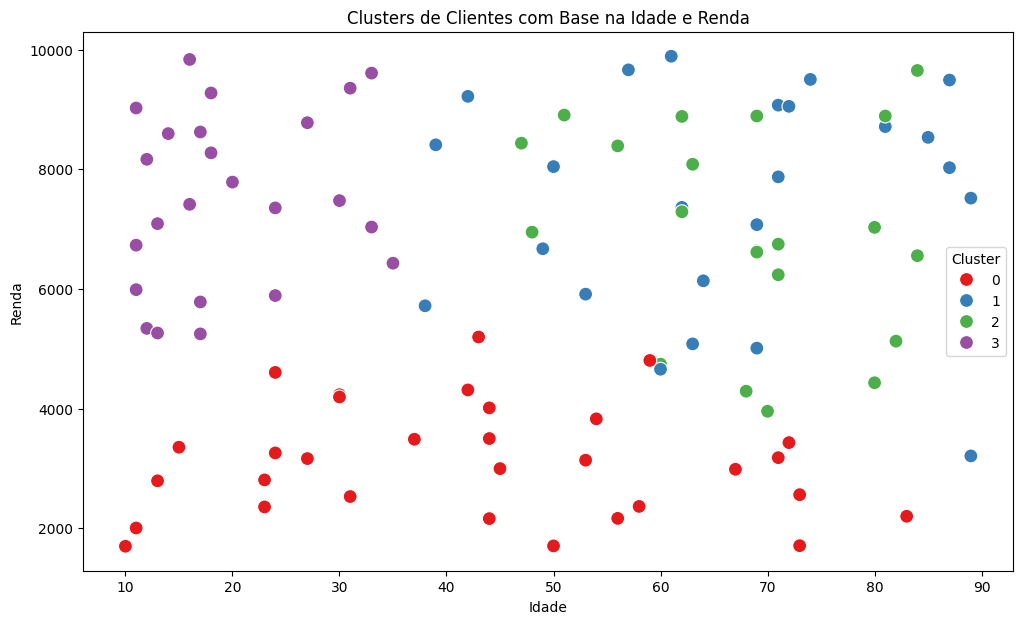

   Cliente_ID  Idade  Renda  Frequencia_Visitas Pacote_Streaming Faixa_Etaria  \
0           1     61   9892                   4         Infantil        61-85   
1           2     24   4604                   7  Rádio & Músicas        21-35   
2           3     81   8715                   4         Esportes        61-85   
3           4     70   3954                   9         Infantil        61-85   
4           5     30   4231                   1  Filmes & Séries        21-35   

   Cluster  
0        1  
1        0  
2        1  
3        2  
4        0  
Pacote_Streaming  Culturas & Variedades   Esportes  Filmes & Séries  \
Faixa_Etaria                                                          
2-12                           0.000000   0.000000         0.000000   
13-20                         14.285714  21.428571         0.000000   
21-35                         18.750000   6.250000        12.500000   
36-45                         10.000000   0.000000        40.000000   
46-60    

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Simulação da Base de Dados
np.random.seed(42)  # Para reprodutibilidade

dados = {
    'Cliente_ID': range(1, 101),
    'Idade': np.random.randint(10, 90, 100),
    'Renda': np.random.randint(1500, 10000, 100),
    'Frequencia_Visitas': np.random.randint(1, 10, 100),
    'Pacote_Streaming': np.random.choice(['Culturas & Variedades', 'Infantil', 'Filmes & Séries', 'Novelas', 'Notícias', 'Esportes', 'Rádio & Músicas'], 100)
}

df = pd.DataFrame(dados)

# Definindo faixas etárias
bins = [0, 12, 20, 35, 45, 60, 85, 100]
labels = ['2-12', '13-20', '21-35', '36-45', '46-60', '61-85', '86-98']
df['Faixa_Etaria'] = pd.cut(df['Idade'], bins=bins, labels=labels, right=False)

# 2. Análise de Proporção de Pacotes por Faixa Etária
df_grouped = df.groupby(['Faixa_Etaria', 'Pacote_Streaming']).size().unstack().fillna(0)
df_prop = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

# 3. Gráfico de Barras Empilhadas
plt.figure(figsize=(12, 7))
ax = df_prop.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Proporção de Pacotes de Streaming por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Proporção (%)')
plt.legend(title='Pacote de Streaming', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4. Clusterização de Clientes (K-Means)
X = df[['Idade', 'Renda', 'Frequencia_Visitas']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 5. Visualização dos Clusters
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Idade', y='Renda', hue='Cluster', palette='Set1', data=df, s=100)
plt.title('Clusters de Clientes com Base na Idade e Renda')
plt.xlabel('Idade')
plt.ylabel('Renda')
plt.legend(title='Cluster')
plt.show()

# Exibindo as primeiras linhas do DataFrame com a coluna de cluster
print(df[['Cliente_ID', 'Idade', 'Renda', 'Frequencia_Visitas', 'Pacote_Streaming', 'Faixa_Etaria', 'Cluster']].head())

# Exibindo a análise de proporção de pacotes por faixa etária
print(df_prop)
